In [0]:
#importing the packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings("ignore")

In [0]:
#Loading the dataset
#Using the UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names = ['id','clump_thickness','uniform_cell_size','unifrom_cell_shape',
         'marginal_adhesion','single_eptithelial_size','bare_nuclei',
         'bland_chromatin','normal_nucleoli','mitoses','class']

df = pd.read_csv(url, names=names)
df.head()

,id,clump_thickness,uniform_cell_size,unifrom_cell_shape,marginal_adhesion,single_eptithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
# understanding the data with initial statistics
df.describe()

,id,clump_thickness,uniform_cell_size,unifrom_cell_shape,marginal_adhesion,single_eptithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [0]:
# preprocessing the data
print('Shape of the dataframe {}'.format(df.shape))
print('\nNumber of NaNs in the dataframe {}'.format(df.isnull().values.any()))
print('\nTotal number of NaNs in the dataframe by column \n{}'.format(df.isnull().sum()))

Shape of the dataframe (699, 11)

Number of NaNs in the dataframe False

Total number of NaNs in the dataframe by column 
id                         0
clump_thickness            0
uniform_cell_size          0
unifrom_cell_shape         0
marginal_adhesion          0
single_eptithelial_size    0
bare_nuclei                0
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64


In [0]:
# Calulating missing values on a percentage scale
value = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
table = pd.concat([value, percent], axis = 1, keys = ['Total', 'Missing Percent'])
table['Missing Percent'] = table['Missing Percent'].apply(lambda x : x*100)
table

,Total,Missing Percent
class,0,0.0
mitoses,0,0.0
normal_nucleoli,0,0.0
bland_chromatin,0,0.0
bare_nuclei,0,0.0
single_eptithelial_size,0,0.0
marginal_adhesion,0,0.0
unifrom_cell_shape,0,0.0
uniform_cell_size,0,0.0
clump_thickness,0,0.0


In [0]:
# replacing the missing values
df.replace('?',-99999, inplace = True) # tell python to ignore the missing values
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'unifrom_cell_shape',
       'marginal_adhesion', 'single_eptithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [0]:
# dropping the id column (useless for classification)
df.drop(['id'], 1, inplace = True)

In [0]:
df.head()

,clump_thickness,uniform_cell_size,unifrom_cell_shape,marginal_adhesion,single_eptithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [0]:
# understanding the statistics of the dataframe
df.describe()

,clump_thickness,uniform_cell_size,unifrom_cell_shape,marginal_adhesion,single_eptithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness            699 non-null int64
uniform_cell_size          699 non-null int64
unifrom_cell_shape         699 non-null int64
marginal_adhesion          699 non-null int64
single_eptithelial_size    699 non-null int64
bare_nuclei                699 non-null object
bland_chromatin            699 non-null int64
normal_nucleoli            699 non-null int64
mitoses                    699 non-null int64
class                      699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [0]:
# converting the column bare_nuclei into integer
df['bare_nuclei']=df['bare_nuclei'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness            699 non-null int64
uniform_cell_size          699 non-null int64
unifrom_cell_shape         699 non-null int64
marginal_adhesion          699 non-null int64
single_eptithelial_size    699 non-null int64
bare_nuclei                699 non-null int64
bland_chromatin            699 non-null int64
normal_nucleoli            699 non-null int64
mitoses                    699 non-null int64
class                      699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


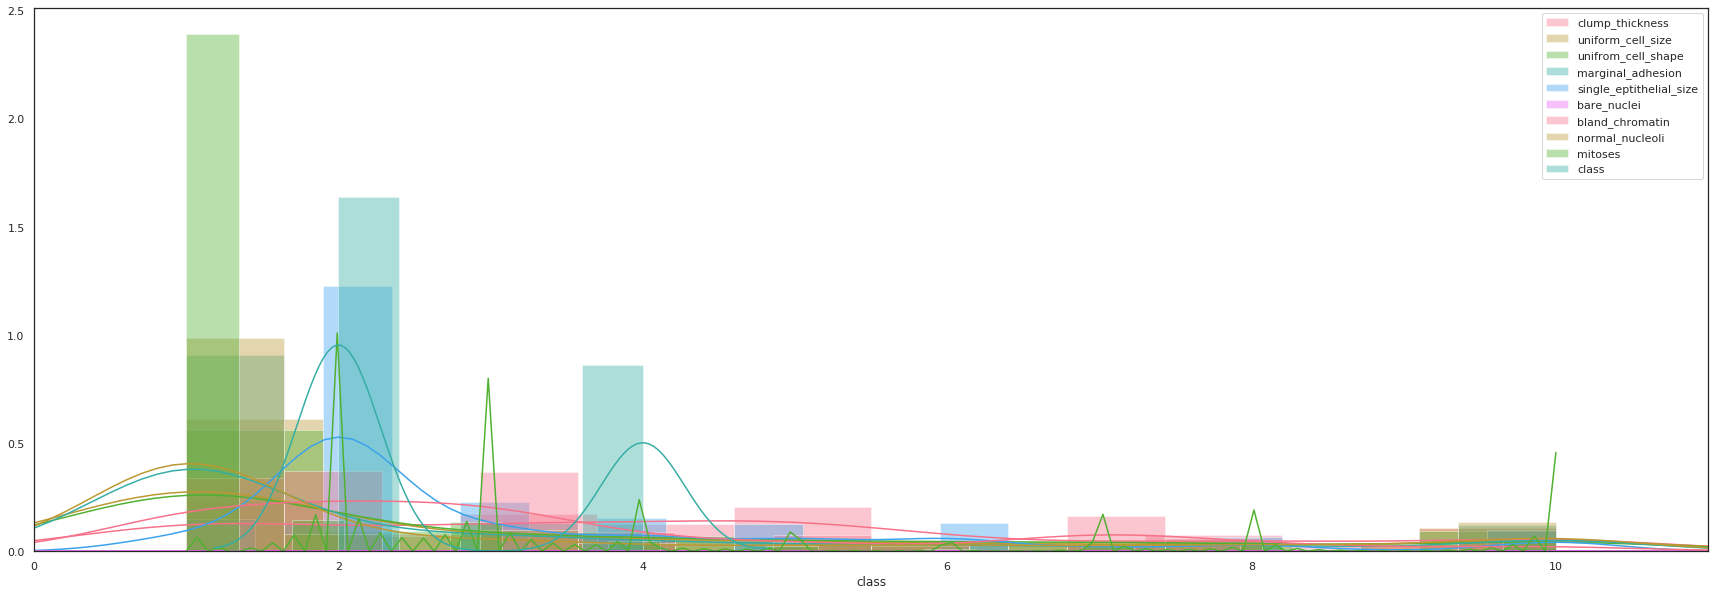

In [0]:
# dataset visualization 
# Check pandas profiling
# plot histogram for each variable
sns.set(color_codes=True)
sns.set(style="white", palette="husl")
fig, ax = plt.subplots(figsize = (30,10))
for a in df.columns:
    sns.distplot(df[a].astype('float'), ax=ax, label = a)
ax.set_xlim(left = 0, right = 11)
ax.legend()
plt.show()

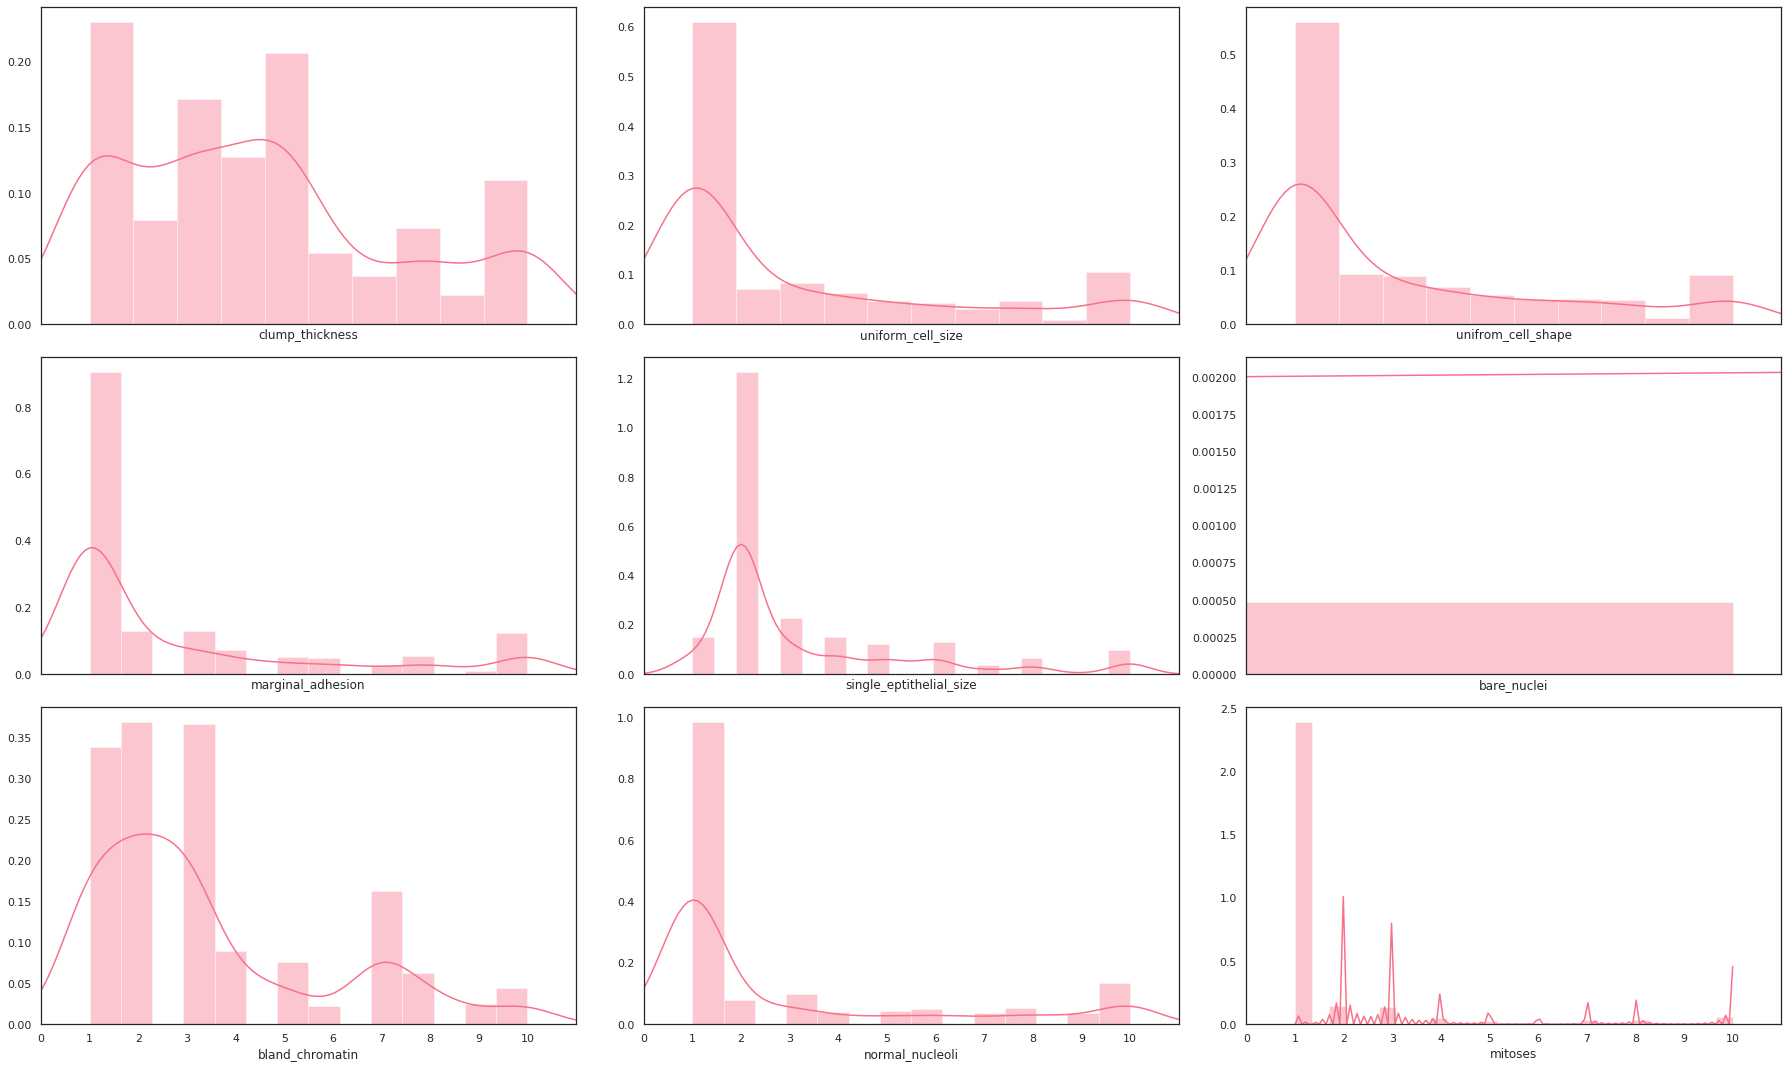

In [0]:
f, axes = plt.subplots(3, 3, figsize=(25, 15), sharex=True)
sns.set(color_codes=True)
sns.set(style="white", palette="pastel")
for ax, feature in zip(axes.flat, df.columns):
    sns.distplot(df[feature], ax=ax, label = feature)
    ax.xaxis.set_ticks(range(0,len(df.columns)+1))
    plt.xlim([0,11])
    plt.xlabel(feature)
    plt.tight_layout()

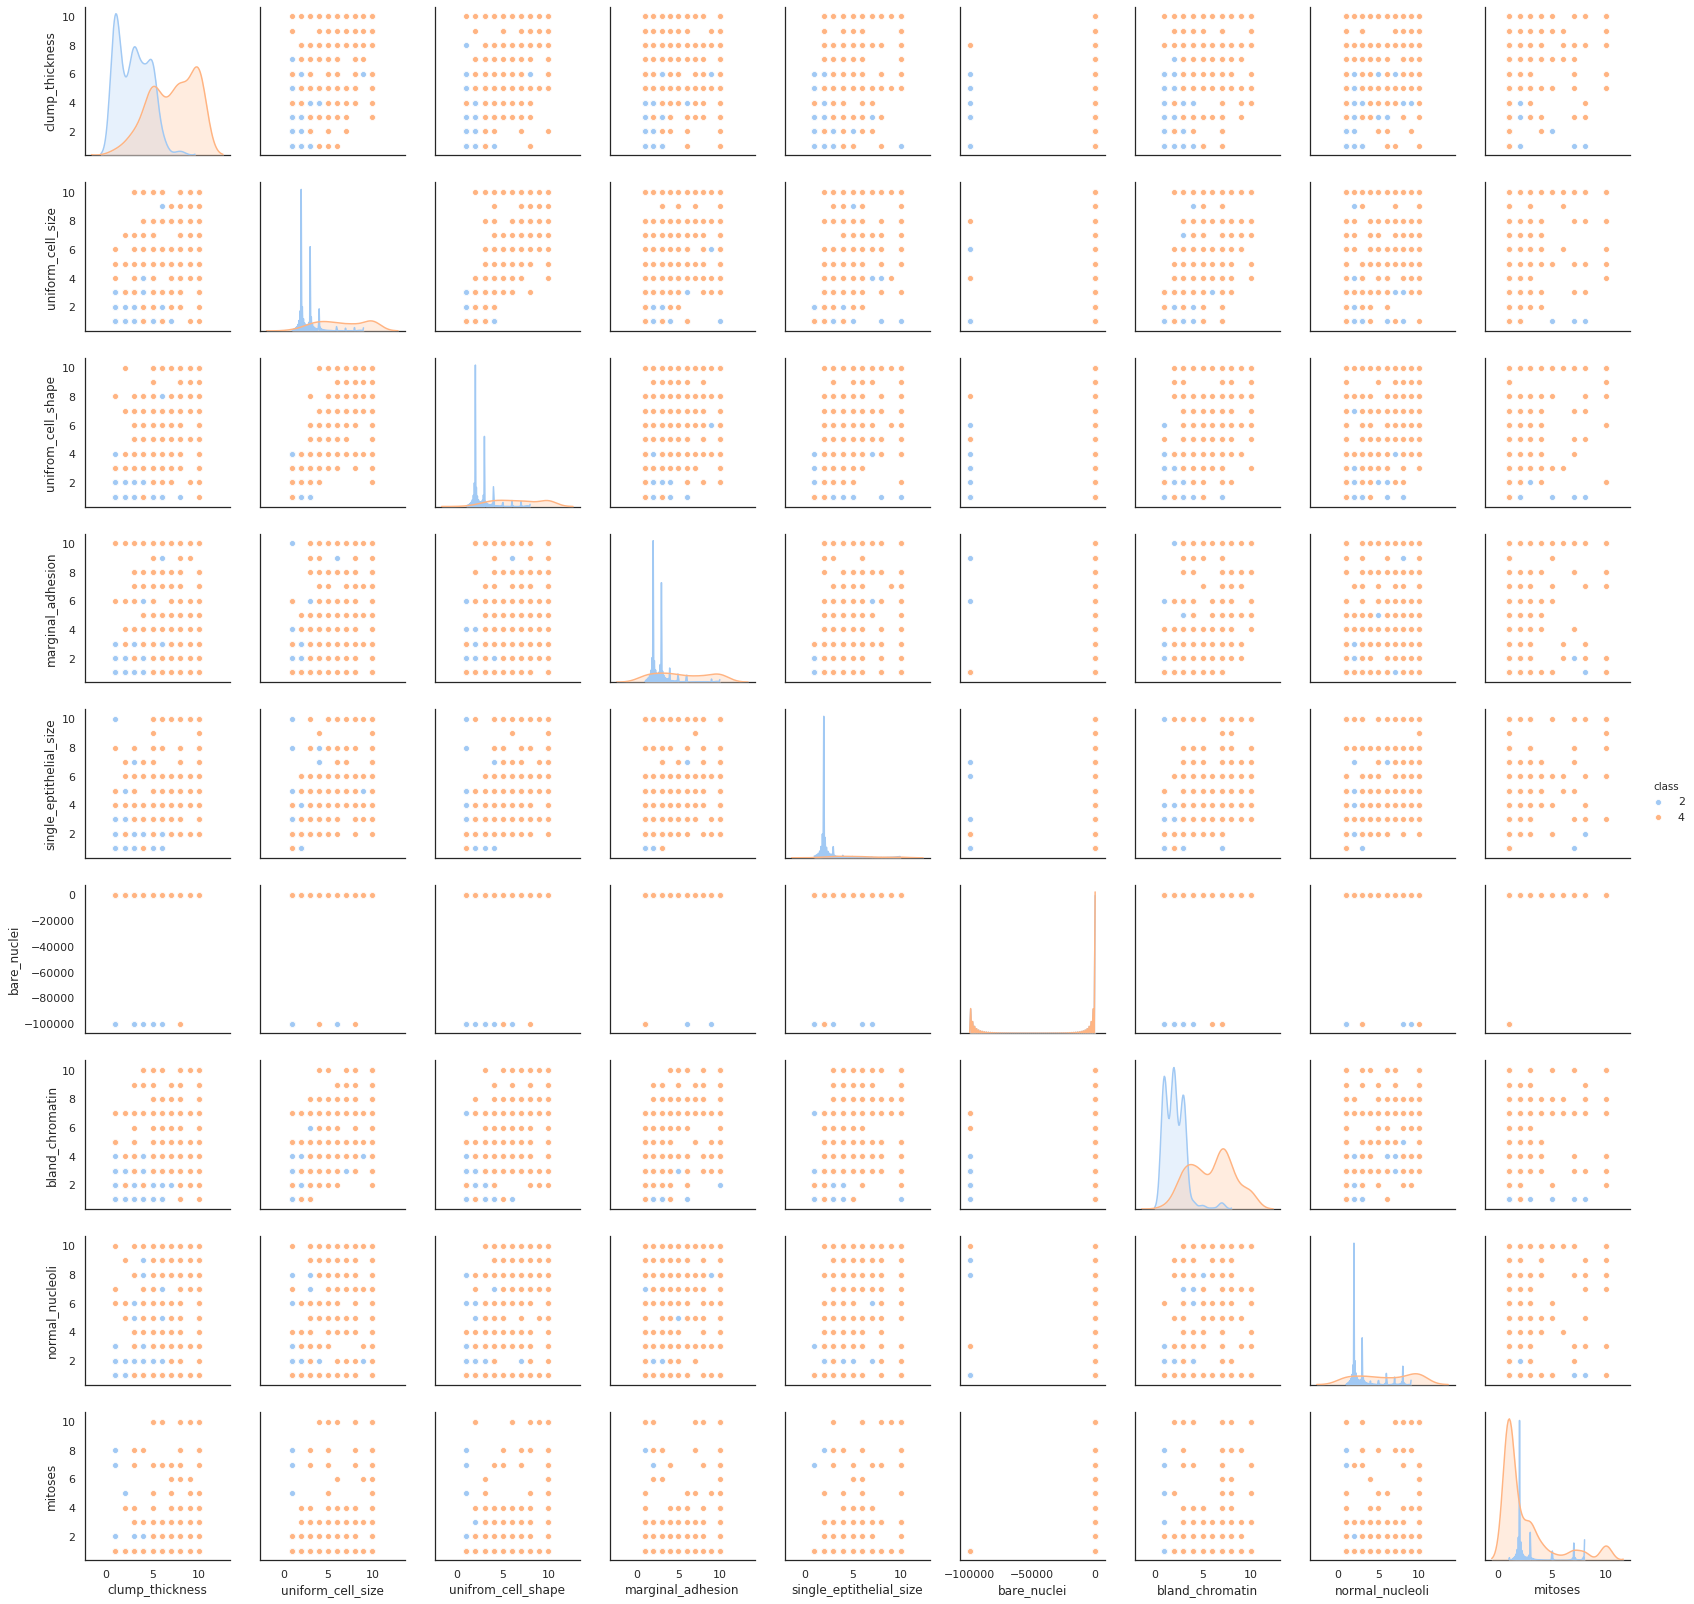

In [0]:
#visualizing pariwise relationship

sns.pairplot(df, vars=df.columns[:-1], hue = "class")
plt.show()

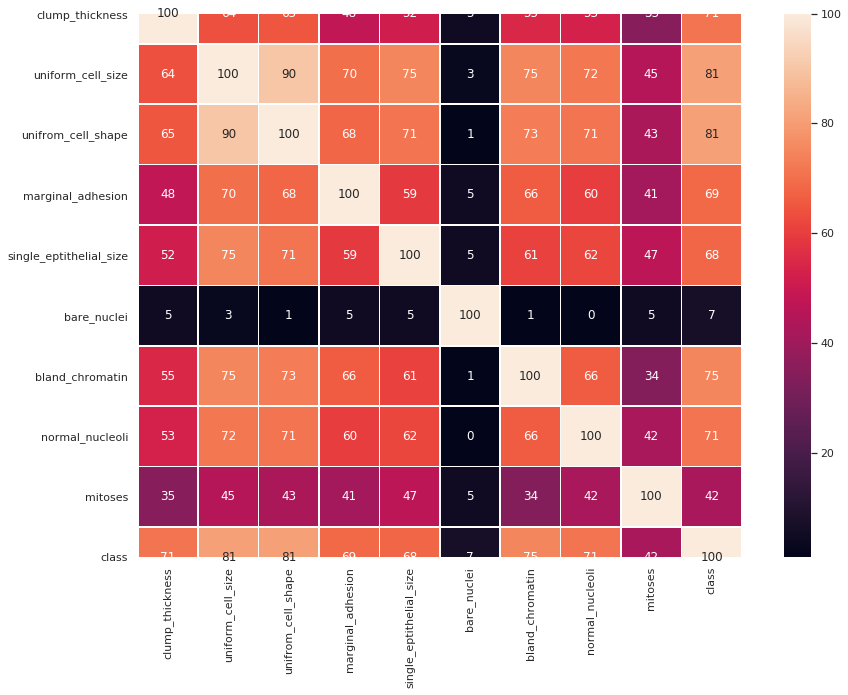

In [0]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap((df.corr()*100).astype('int'), annot=True, square = True, linewidths=.5, ax=ax, robust = True, fmt='d')
plt.show()

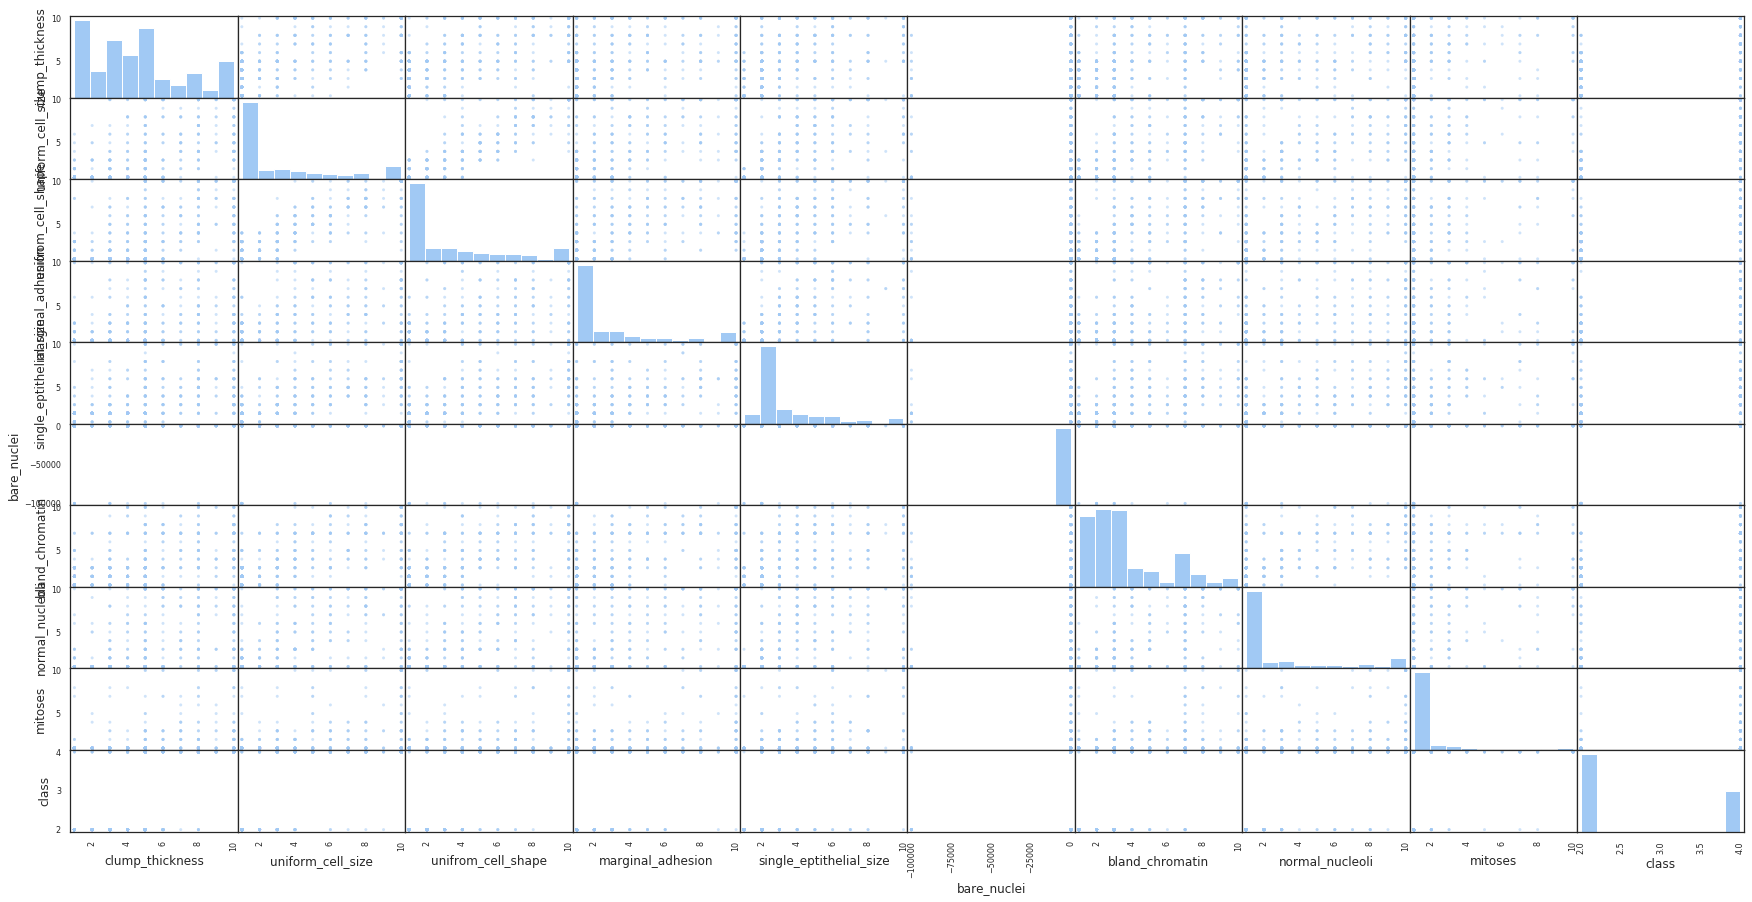

In [0]:
#creating a scatter plot matrix
#this will tell you if linear classifier is going to be a good approach or not
scatter_matrix(df, figsize = (30,15))
plt.show()

In [0]:
# create features and labels data 

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)

In [0]:
# specify testing options

seed = 8
scoring = 'accuracy'

In [0]:
# defining the models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

#Evaluate each model 
results = []
names = []

In [0]:
for name, model in models:
  print(name, model)

KNN KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
SVM SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [0]:
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state = seed)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  print("The accuracy for algorithm '{}' is : {} ({})".format(name, cv_results.mean(), cv_results.std()))

The accuracy for algorithm 'KNN' is : 0.965974025974026 (0.021886970256901242)
The accuracy for algorithm 'SVM' is : 0.9553246753246754 (0.027919888165419036)


In [0]:
# make predictions on validation data set

for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print("Name : {}, Score: {}\n".format(name, accuracy_score(y_test,predictions)))
  print(classification_report(y_test, predictions))

Name : KNN, Score: 0.9571428571428572

              precision    recall  f1-score   support

           2       0.96      0.98      0.97        95
           4       0.95      0.91      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

Name : SVM, Score: 0.9642857142857143

              precision    recall  f1-score   support

           2       0.99      0.96      0.97        95
           4       0.92      0.98      0.95        45

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



In [0]:
# using algorithms to predict for a random data values

for name, model in models:
  clf = model
  clf.fit(X_train, y_train)
  rd = np.array([[4,2,6,3,1,2,6,8,10]])
  rd = rd.reshape(len(rd),-1)
  print("Prediction Class: {} for Algorithm {}".format(clf.predict(rd), name))

Prediction Class: [4] for Algorithm KNN
Prediction Class: [4] for Algorithm SVM
